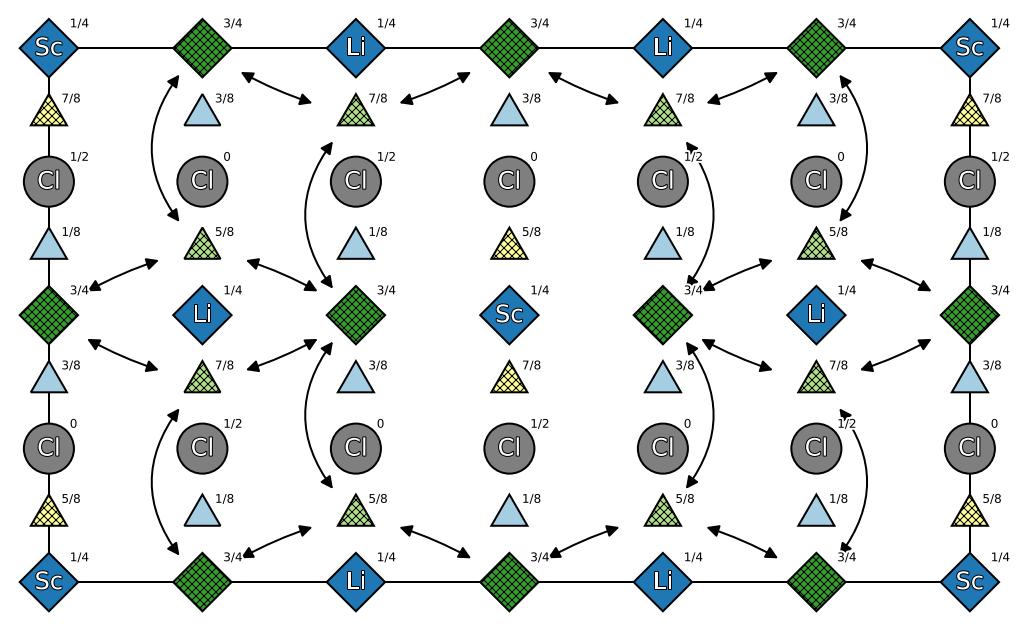

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.path import Path
from matplotlib.lines import Line2D
import matplotlib.patheffects as PathEffects
from site_plot import Site
import numpy as np
from matplotlib import cm
col = cm.get_cmap('Paired')

ticks = []

x_len = 22.08
y_len = 12.80

fig, ax = plt.subplots(figsize=(18,36))
ax.set_aspect('equal', adjustable='box')
ax.axis('off')

verts = [
   (0, 0),  # left, bottom
   (0, y_len),  # left, top
   (x_len, y_len),  # right, top
   (x_len, 0),  # right, bottom
   (0, 0),  # ignored
]

codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]

path = Path(verts, codes)

ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xlim(0-1, x_len+1)
ax.set_ylim(0-1, y_len+1)

patch = patches.PathPatch(path, facecolor='white', lw=2)
ax.add_patch(patch)

ccp_4i_high = [[0,0.25], [0.5,0.75], [1,0.25]]
ccp_4i_low = [0,0.75], [0.5, 0.25], [1,0.75]
ccp_8j_high = [[0.16667,0.75], [0.33333,0.25], [0.66667,0.25], [0.83333,0.75]]
ccp_8j_low = [[0.16667,0.25], [0.33333,0.75], [0.66667,0.75], [0.83333,0.25]]
oct_2a = [[0,0], [1,0], [0,1], [1,1], [0.5,0.5]]
oct_2d = [[0,0.5], [0.5,0], [0.5,1], [1,0.5]]
oct_4g = [[0.16667,0.5], [0.33333,0], [0.33333,1], [0.66667,0], [0.66667,1], [0.83333,0.5]]
oct_4h = [[0.16667,0], [0.16667,1], [0.33333,0.5], [0.66667,0.5], [0.83333,0], [0.83333,1]]
tet_1_high = [[0,0.625], [0.5,0.125], [1,0.625]]
tet_1_low = [[0,0.375], [0.5,0.875], [1,0.375]]
tet_2_high = [[0,0.125], [0.5,0.625], [1,0.125]]
tet_2_low = [[0,0.875], [0.5,0.375], [1,0.875]]
tet_3_high = [[0.16667,0.125], [0.33333,0.625], [0.6667,0.625], [0.83333,0.125]]
tet_3_low = [[0.16667,0.875], [0.33333,0.375], [0.6667,0.375], [0.83333,0.875]]
tet_4_high = [[0.16667,0.625], [0.33333,0.125], [0.66667,0.125], [0.83333,0.625]]
tet_4_low = [[0.16667,0.375], [0.33333,0.875], [0.66667,0.875], [0.83333,0.375]]

sites_list = []

for i in ccp_4i_high:
    sites_list.append(Site(i[0], i[1], '0', 'ccp', '4i'))
for i in ccp_4i_low:
    sites_list.append(Site(i[0], i[1], '1/2', 'ccp', '4i'))
for i in ccp_8j_high:
    sites_list.append(Site(i[0], i[1], '0', 'ccp', '8j'))
for i in ccp_8j_low:
    sites_list.append(Site(i[0], i[1], '1/2', 'ccp', '8j'))
for i in oct_2a:
    sites_list.append(Site(i[0], i[1], '1/4', 'octahedral', '2a'))
for i in oct_2d:
    sites_list.append(Site(i[0], i[1], '3/4', 'octahedral', '2d'))
for i in oct_4g:
    sites_list.append(Site(i[0], i[1], '1/4', 'octahedral', '4g'))
for i in oct_4h:
    sites_list.append(Site(i[0], i[1], '3/4', 'octahedral', '4h'))
for i in tet_1_high:
    sites_list.append(Site(i[0], i[1], '1/8', 'tetrahedral', '1t'))
for i in tet_1_low:
    sites_list.append(Site(i[0], i[1], '3/8', 'tetrahedral', '1t'))
for i in tet_2_high:
    sites_list.append(Site(i[0], i[1], '5/8', 'tetrahedral', '2t'))
for i in tet_2_low:
    sites_list.append(Site(i[0], i[1], '7/8', 'tetrahedral', '2t'))
for i in tet_3_high:
    sites_list.append(Site(i[0], i[1], '1/8', 'tetrahedral', '3t'))
for i in tet_3_low:
    sites_list.append(Site(i[0], i[1], '3/8', 'tetrahedral', '3t'))
for i in tet_4_high:
    sites_list.append(Site(i[0], i[1], '5/8', 'tetrahedral', '4t'))
for i in tet_4_low:
    sites_list.append(Site(i[0], i[1], '7/8', 'tetrahedral', '4t'))

for i in sites_list:
    if i.site_type == 'ccp':
        depth = ax.text((i.position[0]*x_len+0.5), (i.position[1]*y_len+0.5), i.position[2], size=12)
        depth.set_path_effects([PathEffects.withStroke(linewidth=4, foreground='white')])
        species_label = ax.text((i.position[0]*x_len), (i.position[1]*y_len), 'Cl', color = 'white', ha='center', va='center', size=24)
        species_label.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='black')])
        if i.site_id == '4i':
            if i.position[2] == '0':
                ax.add_patch(patches.Circle(((i.position[0]*x_len), (i.position[1]*y_len)), 0.6, facecolor='tab:grey', edgecolor='black', linewidth=2))
            elif i.position[2] == '1/2':
                ax.add_patch(patches.Circle(((i.position[0]*x_len), (i.position[1]*y_len)), 0.6, facecolor='tab:grey', edgecolor='black', linewidth=2))
        elif i.site_id == '8j':
            if i.position[2] == '0':
                ax.add_patch(patches.Circle(((i.position[0]*x_len), (i.position[1]*y_len)), 0.6, facecolor='tab:grey', edgecolor='black', linewidth=2))
            elif i.position[2] == '1/2':
                ax.add_patch(patches.Circle(((i.position[0]*x_len), (i.position[1]*y_len)), 0.6, facecolor='tab:grey', edgecolor='black', linewidth=2))
    elif i.site_type == 'octahedral':
        depth = ax.text((i.position[0]*x_len+0.5), (i.position[1]*y_len+0.5), i.position[2], size=12)
        depth.set_path_effects([PathEffects.withStroke(linewidth=4, foreground='white')])
        if i.site_id == '2a':
            species_label = ax.text((i.position[0]*x_len), (i.position[1]*y_len), 'Sc', color = 'white', ha='center', va='center', size=24)
            species_label.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='black')])
            ax.add_patch(patches.RegularPolygon(((i.position[0]*x_len), (i.position[1]*y_len)), 4, 0.7, facecolor=col(1), edgecolor='black', linewidth=2))
        elif i.site_id == '2d':
            ax.add_patch(patches.RegularPolygon(((i.position[0]*x_len), (i.position[1]*y_len)), 4, 0.7, facecolor=col(3), edgecolor='black', linewidth=2, hatch='xxx'))
        elif i.site_id == '4g':
            species_label = ax.text((i.position[0]*x_len), (i.position[1]*y_len), 'Li', color = 'white', ha='center', va='center', size=24)
            species_label.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='black')])
            ax.add_patch(patches.RegularPolygon(((i.position[0]*x_len), (i.position[1]*y_len)), 4, 0.7, facecolor=col(1), edgecolor='black', linewidth=2))
        elif i.site_id == '4h':
            ax.add_patch(patches.RegularPolygon(((i.position[0]*x_len), (i.position[1]*y_len)), 4, 0.7, facecolor=col(3), edgecolor='black', linewidth=2, hatch='xxx'))
    elif i.site_type == 'tetrahedral':
        depth = ax.text((i.position[0]*x_len+0.3), (i.position[1]*y_len+0.3), i.position[2], size=12)
        depth.set_path_effects([PathEffects.withStroke(linewidth=4, foreground='white')])
        if i.site_id == '1t':
            ax.add_patch(patches.RegularPolygon(((i.position[0]*x_len), (i.position[1]*y_len)), 3, 0.5, facecolor=col(0), edgecolor='black', linewidth=2))
        elif i.site_id == '2t':
            ax.add_patch(patches.RegularPolygon(((i.position[0]*x_len), (i.position[1]*y_len)), 3, 0.5, facecolor=col(10), edgecolor='black', linewidth=2, hatch='xxx'))
        elif i.site_id == '3t':
            ax.add_patch(patches.RegularPolygon(((i.position[0]*x_len), (i.position[1]*y_len)), 3, 0.5, facecolor=col(0), edgecolor='black', linewidth=2))
        elif i.site_id == '4t':
            ax.add_patch(patches.RegularPolygon(((i.position[0]*x_len), (i.position[1]*y_len)), 3, 0.5, facecolor=col(2), edgecolor='black', linewidth=2, hatch='xxx'))

style = "<|-|>, head_width=5, head_length=10"
kw = dict(arrowstyle=style, shrinkA=35, shrinkB=35, color="k", linewidth=2)
kw2 = dict(arrowstyle=style, shrinkA=45, shrinkB=45, color="k", linewidth=2)

a1 = patches.FancyArrowPatch((0.33333*x_len, 0.5*y_len), (0.33333*x_len, 0.875*y_len), connectionstyle="arc3,rad=-.5", **kw)
a2 = patches.FancyArrowPatch((0.66667*x_len, 0.5*y_len), (0.66667*x_len, 0.875*y_len), connectionstyle="arc3,rad=.5", **kw)
a3 = patches.FancyArrowPatch((0.33333*x_len, 0.5*y_len), (0.33333*x_len, 0.125*y_len), connectionstyle="arc3,rad=.5", **kw)
a4 = patches.FancyArrowPatch((0.66667*x_len, 0.5*y_len), (0.66667*x_len, 0.125*y_len), connectionstyle="arc3,rad=-.5", **kw)
a5 = patches.FancyArrowPatch((0.16667*x_len, 0.625*y_len), (0.16667*x_len, 1*y_len), connectionstyle="arc3,rad=-.5", **kw)
a6 = patches.FancyArrowPatch((0.16667*x_len, 0.375*y_len), (0.16667*x_len, 0*y_len), connectionstyle="arc3,rad=.5", **kw)
a7 = patches.FancyArrowPatch((0.83333*x_len, 0.625*y_len), (0.83333*x_len, 1*y_len), connectionstyle="arc3,rad=.5", **kw)
a8 = patches.FancyArrowPatch((0.83333*x_len, 0.375*y_len), (0.83333*x_len, 0*y_len), connectionstyle="arc3,rad=-.5", **kw)
a9 = patches.FancyArrowPatch((0*x_len, 0.5*y_len), (0.16667*x_len, 0.625*y_len), connectionstyle="arc3,rad=-.1", **kw2)
a10 = patches.FancyArrowPatch((0*x_len, 0.5*y_len), (0.16667*x_len, 0.375*y_len), connectionstyle="arc3,rad=.1", **kw2)
a11 = patches.FancyArrowPatch((0.66667*x_len, 0.5*y_len), (0.83333*x_len, 0.625*y_len), connectionstyle="arc3,rad=-.1", **kw2)
a12 = patches.FancyArrowPatch((0.66667*x_len, 0.5*y_len), (0.83333*x_len, 0.375*y_len), connectionstyle="arc3,rad=.1", **kw2)
a13 = patches.FancyArrowPatch((0.16667*x_len, 0.625*y_len), (0.33333*x_len, 0.5*y_len), connectionstyle="arc3,rad=-.1", **kw2)
a14 = patches.FancyArrowPatch((0.16667*x_len, 0.375*y_len), (0.33333*x_len, 0.5*y_len), connectionstyle="arc3,rad=.1", **kw2)
a15 = patches.FancyArrowPatch((0.83333*x_len, 0.625*y_len), (1*x_len, 0.5*y_len), connectionstyle="arc3,rad=-.1", **kw2)
a16 = patches.FancyArrowPatch((0.83333*x_len, 0.375*y_len), (1*x_len, 0.5*y_len), connectionstyle="arc3,rad=.1", **kw2)
a17 = patches.FancyArrowPatch((0.16667*x_len, 1*y_len), (0.33333*x_len, 0.875*y_len), connectionstyle="arc3,rad=.1", **kw2)
a18 = patches.FancyArrowPatch((0.16667*x_len, 0*y_len), (0.33333*x_len, 0.125*y_len), connectionstyle="arc3,rad=-.1", **kw2)
a19 = patches.FancyArrowPatch((0.5*x_len, 1*y_len), (0.66667*x_len, 0.875*y_len), connectionstyle="arc3,rad=.1", **kw2)
a20 = patches.FancyArrowPatch((0.5*x_len, 0*y_len), (0.66667*x_len, 0.125*y_len), connectionstyle="arc3,rad=-.1", **kw2)
a21 = patches.FancyArrowPatch((0.33333*x_len, 0.875*y_len), (0.5*x_len, 1*y_len), connectionstyle="arc3,rad=.1", **kw2)
a22 = patches.FancyArrowPatch((0.33333*x_len, 0.125*y_len), (0.5*x_len, 0*y_len), connectionstyle="arc3,rad=-.1", **kw2)
a23 = patches.FancyArrowPatch((0.66667*x_len, 0.875*y_len), (0.83333*x_len, 1*y_len), connectionstyle="arc3,rad=.1", **kw2)
a24 = patches.FancyArrowPatch((0.66667*x_len, 0.125*y_len), (0.83333*x_len, 0*y_len), connectionstyle="arc3,rad=-.1", **kw2)

arrows = [a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17, a18, a19, a20, a21, a22, a23, a24]

for a in arrows:
    ax.add_patch(a)

plt.savefig('monoclinic.jpg', bbox_inches='tight', dpi=500)